# Projet de fin de semestre - Informatique 

## Prédiction de la couleur d'un pixel

### Détails du projet : 

In [1]:
#Import de modules
from PIL import Image
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from projet_pixels import *
from projet_carrés import *
import time



(266, 190)


### **Détails des variables utilisées dans ce jupyter**

I - un unique pixel

- img : image originale téléchargée
- imgData : image transformée en numpy array car plus utilisable 
- img1 : copy de img, pour laquelle on enlève un pixel 
- img2 : copy de img1 dont on prédit la couleur du pixel à l'aide de la méthode de la moyenne 
- img3 : copy de img1 dont on prédit la couleur du pixel à l'aide de la méthode de l'écart-type
- img4 : copy de img1 dont on prédit la couleur du pixel à l'aide de la méthode du gradient 

II - Un patch de pixels




### I - Affichage et modification d'une image

Notre premier objectif est de comprendre comment, et avec quels outils nous pouvons manipuler des images. Nous choisissons pour commencer une unique image, que nous souhaitons afficher, et ensuite, changer la couleur de pixels aléatoires. Pour cela nous utilisons le module *Image* de la bibliothèque *PIL*, et nous ouvrons notre image avec la commande 'img = Image.open(path)', comme suit: 

(266, 190)


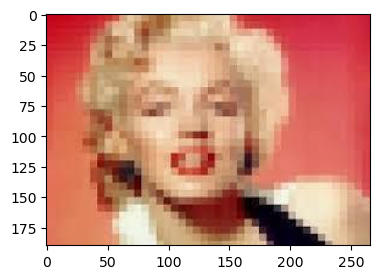

In [2]:
#Importation d'une image 
path = '/Users/amandine/Desktop/Perso/Education/Code/Projets perso - Info/Python_CUPGE1/Projet_fin_semestre/pixels.jpg'

plt.figure(figsize = (5, 3))
#On vérifit si le chemin existe
if os.path.exists(path):
    img = Image.open(path)
    print(img.size)
    plt.imshow(img)
    
else :
    print('Chemin introuvable')

img1 = img.copy()

Pour pouvoir modifier une image, il faut la transformer en données lisibles pour notre ordinateur. On transforme l'image en matrice représentant les données de chaque pixels. Une fonction numpy s'en charge pour nous:

In [3]:
#Transformation d'une image en données exploitables 
#L'image est maintenant sous forme de matrices qui representes les pixels 
imgData = np.asarray(img)
#print(imgData)


Maintenant, nous voulons choisir des pixels aléatoirement et leur attribuer une couleur spécifique, ici, nous appliquerons du vert afin que ce soit bien visible, (0,255, 0). On définit les nombres de pixels que nous voulons enlever, que nous appelons *num_pixels*, et nous créer la variable *square_size* afin d'enlever des carrés de pixels si nous le souhaitons. Pour cela, nous devons commencer par récupérer les dimensions de l'images, puis utiliser le module np.random.randint() pour determiner des coordonées aléatoires. Finalement, on attribue à chacune de ces coordonnées, la valeur (0, 255, 0)

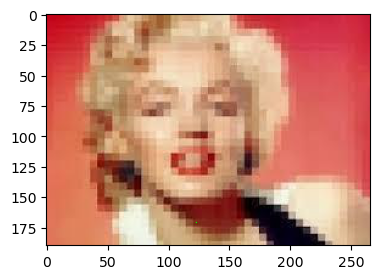

In [4]:
plt.figure(figsize = (5, 3))
enlever_pixels(img1, 1)

### II - Premiers modèles de prédictions

#### A) En utilisant la moyenne des pixels alentours

On crée des copies de l'image afin de bien s'assurer de prendre l'image de base pour chaque prédiction (et pas une image déjà modifiée)

In [5]:
img2 = img1.copy() #Moyenne 
img3 = img1.copy() #Ecart-type
img4 = img1.copy() #Gradient 

L'idée est de créer un patch autour du pixel masqué (pixel vert), de récolter les données de chaque pixel situé sur ce patch, et de determiner la moyenne des rouges, verts et bleus. Enfin, on attribue à notre pixel vert la valeur des moyennes.

In [6]:
moyenne_autour(img2, patch_size = 6)


[(123, 171)]


[(126, 49, 28)]

<Figure size 500x300 with 0 Axes>

Ainsi, la fonction *moyenne_autour* renvoie deux listes: *'coordonnées_mask'* et *'Moyennes'*, soit les coordonnées de chaque pixels manquants (verts) associé à la valeur de ce pixel après avoir considéré les moyennes des pixels autour

#### B) En utilisant l'écart-type 

Nous allons maintenant utiliser une seconde approche qui consiste à considérer l'écart-type 

In [7]:
ecart_type(img3)

[123, 171]


(0, 0, 0)

In [8]:
#plt.figure(figsize = (5, 3))
#plt.imshow(img3)

Dans ce code, on ne prend pas en compte la moyenne des ecarts-type qui pourrait s'avérer être négligeable (trop petite). On préfère donc faire l'approximation moyenne_ecart_type = ecart_type.
De plus, on calcul l'écart-type sur l'ensemble des données des pixels autours 

#### C) En utilisant le gradient 

In [9]:
def gradient(image, mask = (0, 255, 0), patch_size = 3):
    width, height = image.size 
    for x in range(width): 
        for y in range(height): 
            r, g, b = image.getpixel((x, y))
            if (r, g, b) == mask: 
                if x >= patch_size//2 and x < width - patch_size//2 and \
                y >= patch_size//2 and y < height - patch_size//2 :
                    for i in range(patch_size/2):
                        for j in range(patch_size/2):
                            left = np.array.append(image.getpixel((x, y-j)))
                            right = np.array.append(image.getpixel((x, y+j)))
                            up = np.array.append(image.getpixel((x+i, y)))
                            down = np.array.append(image.getpixel((x-i, y)))
                    grad_x = np.abs(right - left)
                    grad_y = np.abs(up - down)
                    
                        


#### D) Comparaison des modèles 




Nous souhaitons comparer nos méthodes de prédictions, et pour cela, nous allons calculer leur erreurs moyennes, ainsi que le temps d'execution de chaque méthode.

In [10]:
E_M_Moyenne = erreur_moyenne(img, img2)
E_M_Ecart_type = erreur_moyenne(img, img3)

#Temps d'execution de la methode de la moyenne
start_time = time.time()
img_predicted = moyenne_autour(img2)  # Exécuter la méthode
elapsed_time = time.time() - start_time

#Temps d'execution de la methode de la moyenne
start_time2 = time.time()
img_predicted2 = ecart_type(img3)  # Exécuter la méthode
elapsed_time2 = time.time() - start_time


results = [[ 'Erreur moyenne', E_M_Moyenne, E_M_Ecart_type], [ "Temps (s)", elapsed_time, elapsed_time2], ["Données du pixel prédit", img_predicted, img_predicted2 ]]

df = pd.DataFrame(results, columns= ['', 'Moyenne', 'Ecart_type'])
#df = pd.DataFrame({'Moyenne': [E_M_Moyenne], 'Ecart-type': [E_M_Ecart_type]})

print(df)


[]
                             Moyenne  Ecart_type
0           Erreur moyenne         0    0.000000
1                Temps (s)  0.012512    0.025257
2  Données du pixel prédit        []         NaN


<Figure size 500x300 with 0 Axes>

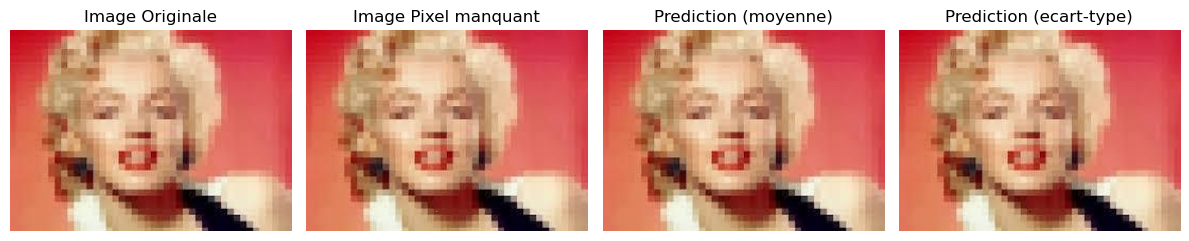

In [11]:
afficher_comparaison(img, img1, img2, img3)

In [12]:
#############################
# RAJOUTER UNE COMPARAISON QUE DU PIXEL EN QUESTION PCK LA ON VOIT PAS GRAND CHOSE 
# SCORE SSIM 
#############################

### II - Prédiction de parties manquantes 


Maintenant, nous souhaitons nous pencher sur la prédiction d'une plus grande partie de l'image, et pour cela, nous pouvons essayer d'utiliser les mêmes méthodes que celles utilisées pour la prédiction d'un pixel, c'est-à-dire en regardant la moyenne, l'écart-type de le gradient.

In [13]:
#Importation d'une image 
path = '/Users/amandine/Desktop/Perso/Education/Code/Projets perso - Info/Python_CUPGE1/Projet_fin_semestre/pixels.jpg'

plt.figure(figsize = (5, 3))
#On vérifit si le chemin existe
if os.path.exists(path):
    img4 = Image.open(path)
    #print(img.size)
    
else :
    print('Chemin introuvable')

img4_prime = img4.copy()
#plt.imshow(img4)

<Figure size 500x300 with 0 Axes>

Coin supérieur à gauche du carré vert de coordonnées: 95 126
Taille du carré vert 10 x 10


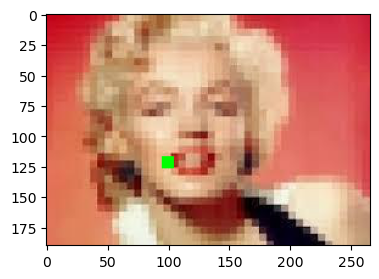

In [14]:
plt.figure(figsize = (5,3))
carré(img4, 10)

img5 = img4.copy()
img6 = img4.copy()
img7 = img4.copy()

On utilise les trois méthodes déjà faites pour voir leur comportement pour un grand nombre de pixels manquants, et si ces modèles sont toujours adaptés.

#### A) En utilisant la moyenne 

In [15]:
plt.figure(figsize = (5, 3))
moyenne_carré(img5)


<Figure size 500x300 with 0 Axes>

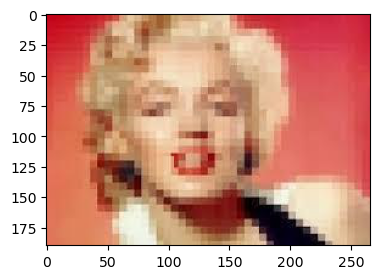

In [16]:
plt.figure(figsize=(5, 3))
plt.imshow(img5)

Ici, toujours avec la méthode de la moyenne, seulement, nous avons modifié l'ordre de lecture des pixels, non plus par lignes, mais en escargot.

Aucun pixel masqué trouvé.


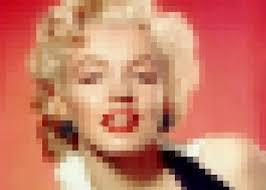

In [17]:
moyenne_escargot(img6, mask=(0, 255, 0), visited=None, step_index=0, x=None, y=None, dx=1, dy=0)

#### B) En utilisant l'écart-type 

In [18]:
def ecart_type_escargot(image, mask=(0, 255, 0), visited=None, step_index=0, x=None, y=None, dx=1, dy=0):
    width, height = image.size
    mask_pixels = [(x, y) for x in range(width) for y in range(height) if image.getpixel((x, y)) == mask]

    if not mask_pixels:
        print("Aucun pixel masqué trouvé.")
        return image

    # Définir les limites du carré à remplir
    x_min = min(x for x, y in mask_pixels)
    y_min = min(y for x, y in mask_pixels)
    x_max = max(x for x, y in mask_pixels)
    y_max = max(y for x, y in mask_pixels)

    if visited is None:
        visited = set()
        x, y = x_min, y_min  # Départ en haut à gauche

    steps = [(1, 0), (0, 1), (-1, 0), (0, -1)]  # Droite, Bas, Gauche, Haut

    # Si le pixel est à remplir
    if (x, y) in mask_pixels:
        voisins = [(x + dx, y + dy) for dx, dy in steps]
        voisins_valides = [image.getpixel((vx, vy)) for vx, vy in voisins if (vx, vy) not in mask_pixels and 0 <= vx < width and 0 <= vy < height]
        sumR, sumG, sumB = [], [], []
        if voisins_valides:
            sumR.extend([r for r, g, b in voisins_valides])
            sumG.extend([g for r, g, b in voisins_valides])
            sumB.extend([b for r, g, b in voisins_valides])
            
            if len(sumR) > 1:
                E_T_R = int(np.std(sumR, ddof = 1))
                E_T_G = int(np.std(sumG, ddof = 1))
                E_T_B = int(np.std(sumB, ddof = 1))
            
            else:
                E_T_R = np.mean(sumR)
                E_T_G = np.mean(sumG)
                E_T_B = np.mean(sumB)

            image.putpixel((x, y), (E_T_R, E_T_G, E_T_B))

    visited.add((x, y))

    # Calculer le prochain pixel
    next_x, next_y = x + dx, y + dy

    # Vérifier si on doit changer de direction
    if next_x < x_min or next_x > x_max or next_y < y_min or next_y > y_max or (next_x, next_y) in visited:
        step_index = (step_index + 1) % 4  # Passer à la prochaine direction en Modulo 4
        dx, dy = steps[step_index]
        next_x, next_y = x + dx, y + dy

    # Condition d'arrêt
    if len(visited) == len(mask_pixels):
        plt.imshow(image)
        plt.axis("off")
        plt.show()
        return image

    # Appel récursif
    return ecart_type_escargot(image, mask, visited, step_index, next_x, next_y, dx, dy)

Aucun pixel masqué trouvé.


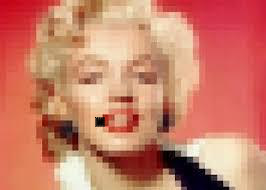

In [19]:
ecart_type_escargot(img7, mask=(0, 255, 0), visited=None, step_index=0, x=None, y=None, dx=1, dy=0)


In [20]:
img7 = Image.open('/Users/amandine/Desktop/Perso/Education/Code/Projets perso - Info/Python_CUPGE1/Projet_fin_semestre/pixels.jpg')

def mask(image, mask_size = 30, mask_pos = None, augmentation_factor = 10):
    width, height = image.size 
    image = np.asarray(image)
    all_inputs = []
    all_target = []
    all_x_start = []
    all_y_start = []
    for i in range(augmentation_factor): 
            if mask_pos is None : 
                x_start = np.random.randint(0, width - mask_size)
                y_start = np.random.randint(0, height - mask_size) 

            else : 
                x_start, y_start = mask_pos
        
            masked_img = image.copy()
            print(masked_img)
            for i in range(-mask_size//2,  mask_size//2):
                for j in range(-mask_size//2,  mask_size//2):
                    target_region = masked_img[y_start+j, x_start+i].copy()
                    masked_img[y_start+j, x_start+i] = 0
                    all_inputs.append(masked_img.flatten())
                    all_target.append(target_region.flatten())
                    all_x_start.append(x_start)
                    all_y_start.append(y_start)
            print(all_target)
            
    return np.array(all_inputs), np.array(all_target), np.array(all_x_start), np.array(all_y_start), mask_size

mask(img7)

[[[197   5  28]
  [197   5  28]
  [197   5  28]
  ...
  [199  29  55]
  [199  29  55]
  [201  29  55]]

 [[196   4  27]
  [196   4  27]
  [196   4  27]
  ...
  [199  29  55]
  [199  29  55]
  [201  29  55]]

 [[195   3  26]
  [195   3  26]
  [195   3  26]
  ...
  [199  29  55]
  [199  29  55]
  [201  29  55]]

 ...

 [[227 115  91]
  [227 115  91]
  [227 115  91]
  ...
  [187 153 116]
  [189 155 120]
  [189 155 120]]

 [[227 115  91]
  [227 115  91]
  [227 115  91]
  ...
  [187 153 116]
  [189 155 120]
  [189 155 120]]

 [[229 115  91]
  [227 115  91]
  [227 115  91]
  ...
  [186 152 115]
  [188 154 119]
  [188 154 119]]]
[array([144,  68,  45], dtype=uint8), array([138,  66,  41], dtype=uint8), array([168, 101,  74], dtype=uint8), array([198, 135, 104], dtype=uint8), array([187, 126,  95], dtype=uint8), array([185, 126,  92], dtype=uint8), array([193, 137, 100], dtype=uint8), array([183, 128,  89], dtype=uint8), array([176, 121,  82], dtype=uint8), array([169, 111,  71], dtype=uint8),

(array([[197,   5,  28, ..., 188, 154, 119],
        [197,   5,  28, ..., 188, 154, 119],
        [197,   5,  28, ..., 188, 154, 119],
        ...,
        [197,   5,  28, ..., 188, 154, 119],
        [197,   5,  28, ..., 188, 154, 119],
        [197,   5,  28, ..., 188, 154, 119]], dtype=uint8),
 array([[144,  68,  45],
        [138,  66,  41],
        [168, 101,  74],
        ...,
        [188, 114,  79],
        [177, 114,  81],
        [182, 122,  88]], dtype=uint8),
 array([68, 68, 68, ..., 63, 63, 63]),
 array([145, 145, 145, ...,   3,   3,   3]),
 30)

#### D) Comparaison des modèles  

Nous comparons maintenant nos modèles de prédictions des parties d'images 

In [21]:
##################################
# MODIFIER LA COMPARAISON POUR NE REGARDER QUE LA PARTIE CONCERNÉE ET RAJOUTE L'ECART-TYPE + LE GRADIENT
##################################

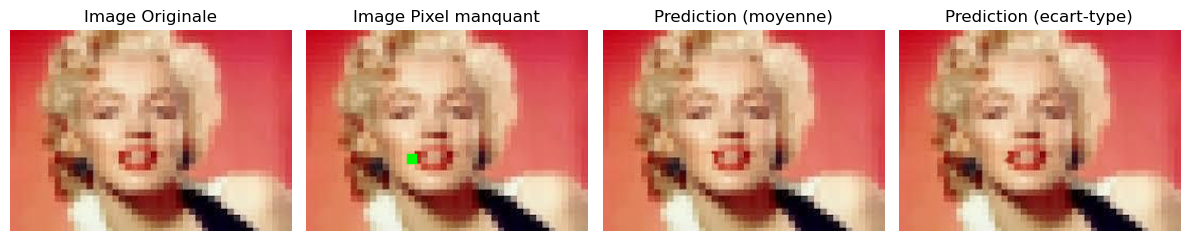

In [22]:
afficher_comparaison_carrés(img4_prime, img4, img5, img6)

Regarder les filtres de la transformée de fourier (filtre passe bas, passe haut)

produit de convolution 

inpainting 

utiliser une grande bibliothèque pour faire des comparaison (sur open cv chercher inpainting)